<a href="https://colab.research.google.com/github/kushwahapriya878/Code-Creations/blob/main/rca_uber_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RCA Analysis -Uber Dataset**
**Root Cause Analysis for No cab availability at Airport to City on Uber**

The following dataset is for an online Transportation booking platform where users were facing cab non availability at Airport to City.

*  Define the Problem
*  Gather Data
*  Find the Cause
*  Find Solutions



**Problem Statement**

Cab unavailability at the airport for rides to the city on the Uber platform is causing inconvenience for passengers, leading to longer wait times, reduced customer satisfaction, and potential loss of business for Uber.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Gather Data**

In [ ]:
#lodaing data set
df=pd.read_csv('uber-data.csv')
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


**Exploratory Data Analysis**

In [ ]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [ ]:
df.size

40470

In [ ]:
df.shape

(6745, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
# date columns neeed to convert in proper datetime format
df['Request timestamp1']= pd.to_datetime(df['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Request timestamp2']= pd.to_datetime(df['Request timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Request timestamp']= df['Request timestamp1'].combine_first(df['Request timestamp2'])
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp1,Request timestamp12,Request timestamp2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,2016-07-11 11:51:00,NaT,NaT
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,2016-07-11 17:57:00,NaT,NaT
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,2016-07-12 09:17:00,NaT,NaT
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,2016-07-12 21:08:00,NaT,NaT
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,NaT,2016-07-13 08:33:16,2016-07-13 08:33:16
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN,NaT,2016-07-15 23:49:03,2016-07-15 23:49:03
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN,NaT,2016-07-15 23:50:05,2016-07-15 23:50:05
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN,NaT,2016-07-15 23:52:06,2016-07-15 23:52:06
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN,NaT,2016-07-15 23:54:39,2016-07-15 23:54:39


In [ ]:
df['Drop timestamp1']= pd.to_datetime(df['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Drop timestamp2']= pd.to_datetime(df['Drop timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Drop timestamp']=df['Drop timestamp1'].combine_first(df['Drop timestamp2'])
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp1,Request timestamp12,Request timestamp2,Drop timestamp1,Drop timestamp2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11 11:51:00,NaT,NaT,2016-07-11 13:00:00,NaT
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11 17:57:00,NaT,NaT,2016-07-11 18:47:00,NaT
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12 09:17:00,NaT,NaT,2016-07-12 09:58:00,NaT
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12 21:08:00,NaT,NaT,2016-07-12 22:03:00,NaT
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,NaT,2016-07-13 08:33:16,2016-07-13 08:33:16,NaT,2016-07-13 09:25:47
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,NaT,2016-07-15 23:49:03,2016-07-15 23:49:03,NaT,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,NaT,2016-07-15 23:50:05,2016-07-15 23:50:05,NaT,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,NaT,2016-07-15 23:52:06,2016-07-15 23:52:06,NaT,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,NaT,2016-07-15 23:54:39,2016-07-15 23:54:39,NaT,NaT


In [ ]:
df.drop(columns=['Request timestamp1', 'Request timestamp2', 'Drop timestamp1', 'Drop timestamp2', 'Request timestamp12'], axis=1, inplace=True)

In [ ]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [ ]:
df.isna().sum()/len(df) *100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

Maybe 58% of times we don't have any cabs available or there are ride cancellations
Also the above data gives insight that 39.28% of the times there is no cab available
This also suggests that there might be 19% cancellation rate

**Find the Cause**

In [ ]:
def is_cab_available(x):
  if x=='Trip Completed':
    return 'available'
  else:
    return 'not_available'

df['cab_availability']= df['Status'].apply(is_cab_available)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,cab_availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,available


In [ ]:
# Separate 5 different timeslots from the Hour - D awn, Early Morning, Noon, Late Evening, Night
df['request_hour']=df['Request timestamp'].dt.hour

def time_slot(x):
  if x<=4:
    return 'dawn'
  elif x<=9:
    return 'early_morning'
  elif x<=16:
    return 'noon'
  elif x<=21:
    return 'late_evening'
  else:
    return 'night'

df['time_slot']=df['request_hour'].apply(time_slot)
df[['request_hour', 'time_slot']]

,request_hour,time_slot
0,11,noon
1,17,late_evening
2,9,early_morning
3,21,late_evening
4,8,early_morning
...,...,...
6740,23,night
6741,23,night
6742,23,night
6743,23,night


In [ ]:
df.drop('request_hoour', axis=1, inplace=True)


KeyError: "['request_hoour'] not found in axis"

In [ ]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,cab_availability,request_hour,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,available,11,noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,available,17,late_evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,available,9,early_morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,available,21,late_evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,available,8,early_morning
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,not_available,23,night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,not_available,23,night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,not_available,23,night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,not_available,23,night


<Axes: ylabel='count'>

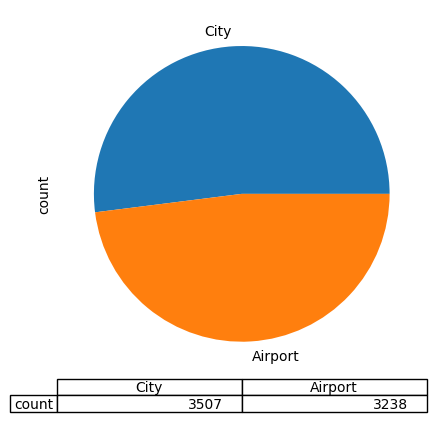

In [ ]:
# frequecy of cab city to airport
df['Pickup point'].value_counts().plot(kind='pie', table=True)

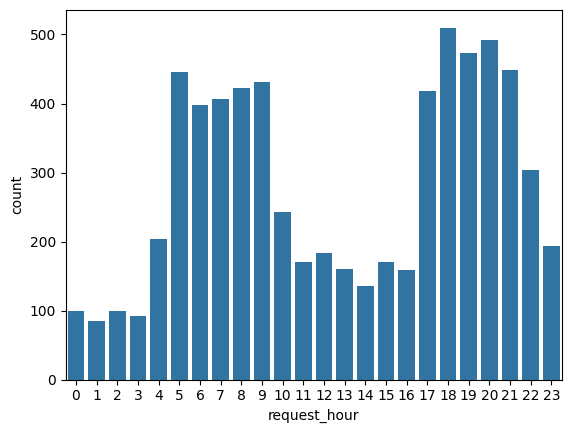

In [ ]:
sns.countplot(data=df, x='request_hour')
plt.show()

by looking at this graph majorly cab is being requested in between 4 to 9 early morning and late evening 5 to 10 pm

<Axes: xlabel='request_hour'>

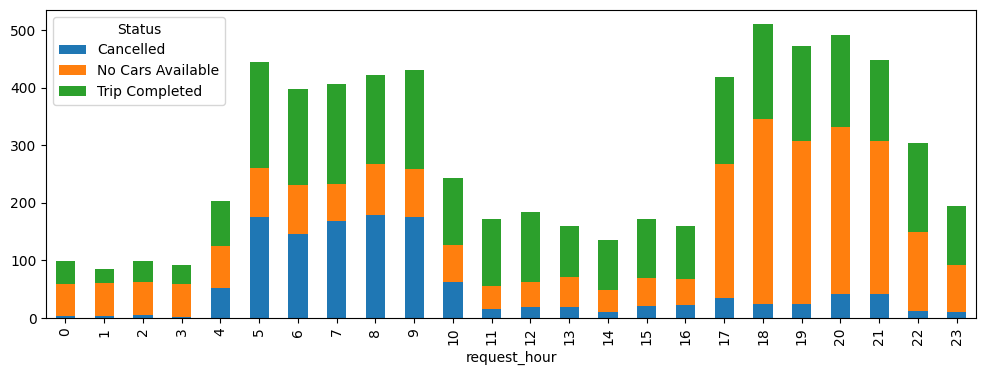

In [ ]:
df.groupby('request_hour')['Status'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12,4))

<Axes: xlabel='time_slot'>

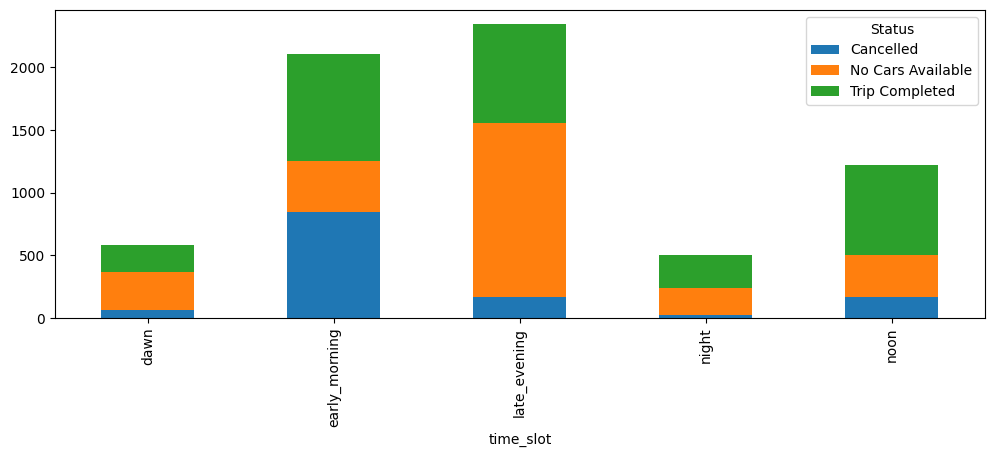

In [ ]:
df.groupby('time_slot')['Status'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12,4))

In [ ]:
# we have two type of ride city to airport and airtport to city so we wnat to see that where is most cab cancelltion is done and cab availabity

In [ ]:
air_df=df[df['Pickup point']=='Airport']
city_df=df[df['Pickup point']=='City']

<Axes: xlabel='request_hour'>

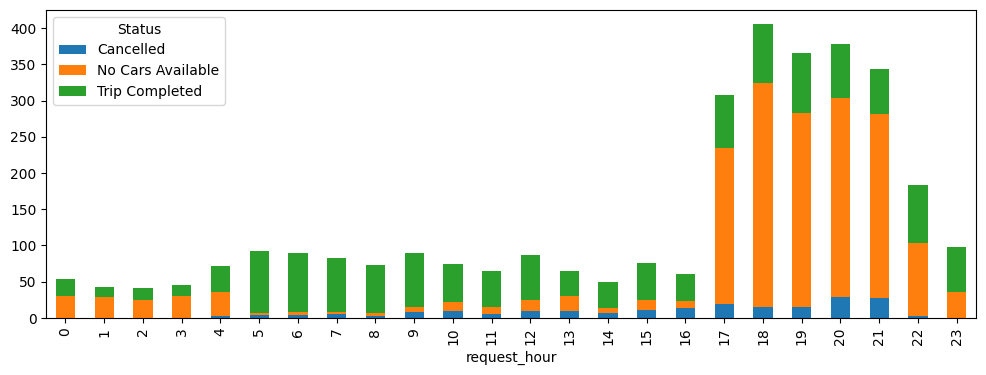

In [ ]:
air_df.groupby('request_hour')['Status'].value_counts().unstack().plot(kind='bar', figsize=(12,4), stacked=True)

<Axes: xlabel='request_hour'>

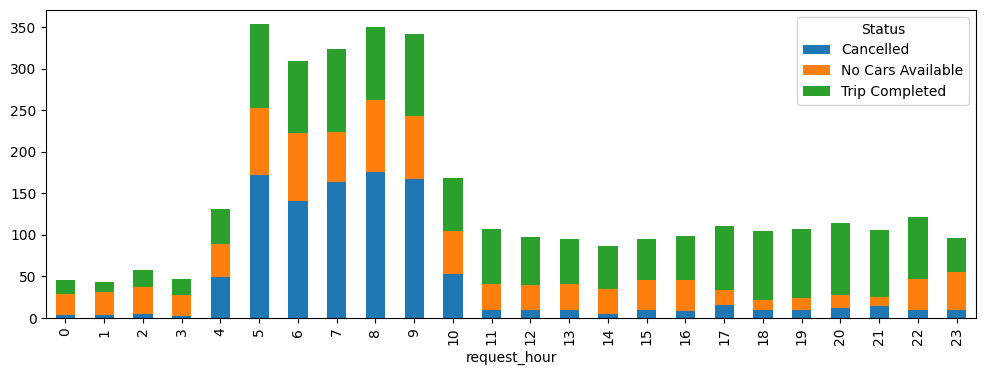

In [ ]:
city_df.groupby('request_hour')['Status'].value_counts().unstack().plot(kind='bar', figsize=(12,4), stacked=True)

# Root cause
--
Drivers are not accpeting the rides from city to airport because they might not get a return ride back to the city and they might have to either wait or return empty handed
Due to this there is major un-availability of cabs in the late evening hours at the airport

--

**Find Solutions**

# Recommendations
---
Increase the airport to city and city to airport tariff
Setup hubs for drivers at the airports with proper facilities where they can wait if they don't get a return ride
---